# Visualize the landmarks in the LSFB datasets

The LSFB ISOL and LSFB CONT datasets contain sequences of skeletons.
Each skeleton consist in a set of landmarks with specific 2D coordinates.
The library provides plotting functions that enable us to visualize those landmarks.

### Load some landmarks

In [1]:
from lsfb_dataset.datasets.lsfb_cont import LSFBContConfig, LSFBContLandmarksGenerator

lsfb_cont_root = 'E:/LSFB/LSFB_CONT'

config = LSFBContConfig(
    root=lsfb_cont_root,
    landmarks=['pose', 'hand_left', 'hand_right'],
    split='mini_sample',
)

dataset = LSFBContLandmarksGenerator(config=config)

features, target = dataset[4]
features.shape, target.shape

---------- LSFB CONT DATASET
Target vectors loaded.


((16218, 130), (16218,))

### Plot the landmarks for a single frame

(<Figure size 286.992x288 with 1 Axes>, <AxesSubplot:>)

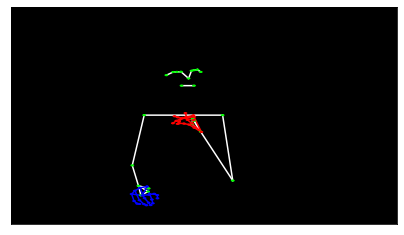

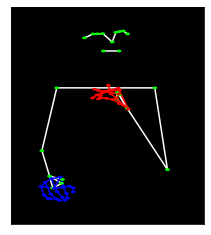

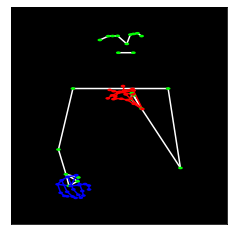

In [2]:
from lsfb_dataset.visualisation.landmarks import plot_landmarks

# Take landmarks at time=400
landmarks = features[400]

# Plot the landmarks
plot_landmarks(landmarks, ['pose', 'hand_left', 'hand_right'])

# Plot the landmarks with manual x and y limits
plot_landmarks(
    landmarks,
    ['pose', 'hand_left', 'hand_right'],
    x_lim=(0.25, 0.65),
    y_lim=(1.0, 0.2),
)

# Plot the landmarks with automatic refocus and padding
plot_landmarks(
    landmarks,
    ['pose', 'hand_left', 'hand_right'],
    refocus=True,
    focus_pad=0.1,
)

### Plot the landmarks of multiple frames

(<Figure size 576x432 with 6 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

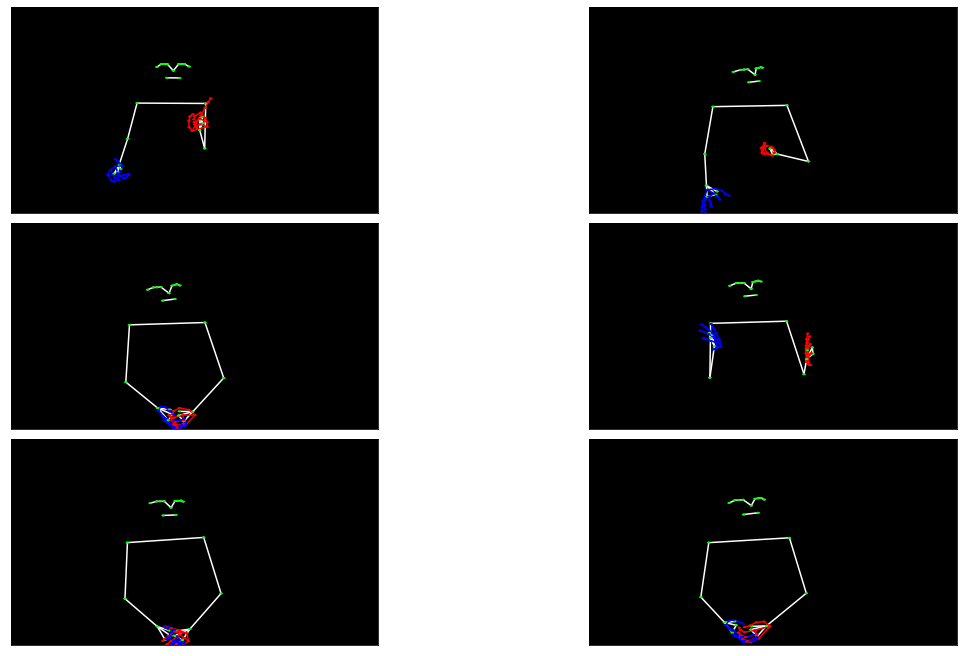

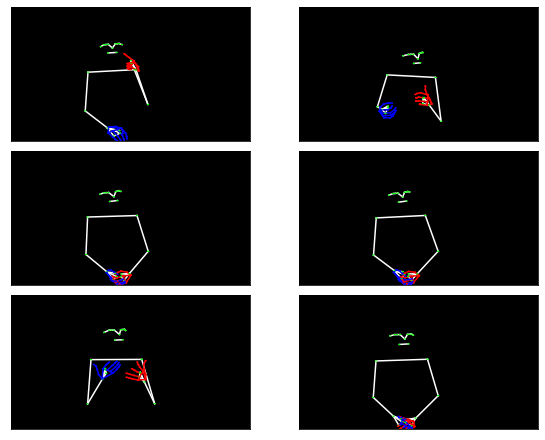

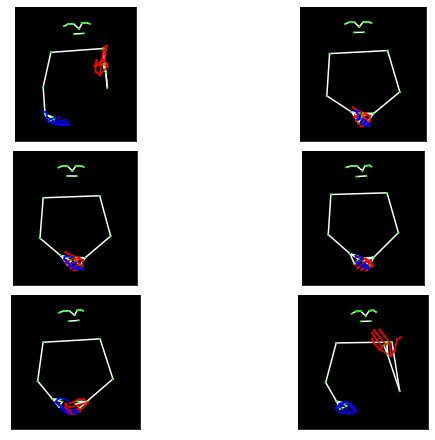

In [5]:
from lsfb_dataset.visualisation.landmarks import plot_grid

# Plot a grid with 3 rows and 2 columns. The cells contain randomly taken landmarks (ordered) from the sequence.
plot_grid(
    features,
    ['pose', 'hand_left', 'hand_right'],
    grid_size=(3, 2),
)

# You can change the size of the figure, the ratio of the boxes and provide specific index for each cell.
plot_grid(
    features,
    ['pose', 'hand_left', 'hand_right'],
    grid_size=(3, 2),
    indices=[
        [150, 1050],
        [2640, 3450],
        [5600, 8900],
    ],
    figsize=(8, 6),
    box_ratio=9/16,
)

# You can also enable the automatic refocus as shown in the previous example
plot_grid(
    features,
    ['pose', 'hand_left', 'hand_right'],
    grid_size=(3, 2),
    figsize=(8, 6),
    refocus=True,
    focus_pad=0.1,
)